<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [8]</a>'.</span>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\tec\tec\DATA_ML\data.csv")

In [4]:
data.head()

,Age,Nationality,Sex,Residence Location,General Problem,Specific Sub-Problem
0,36,Djibouti,Female,Casablanca,Health,Lack of essential medications
1,36,Tunisia,Male,Casablanca,Security,Other
2,22,Rwanda,Female,Marrakech,Health,Limited access to specialized care
3,40,Niger,Male,Rabat,Housing,Lack of accessibility for people with disabili...
4,53,Tunisia,Male,Rabat,Health,Other


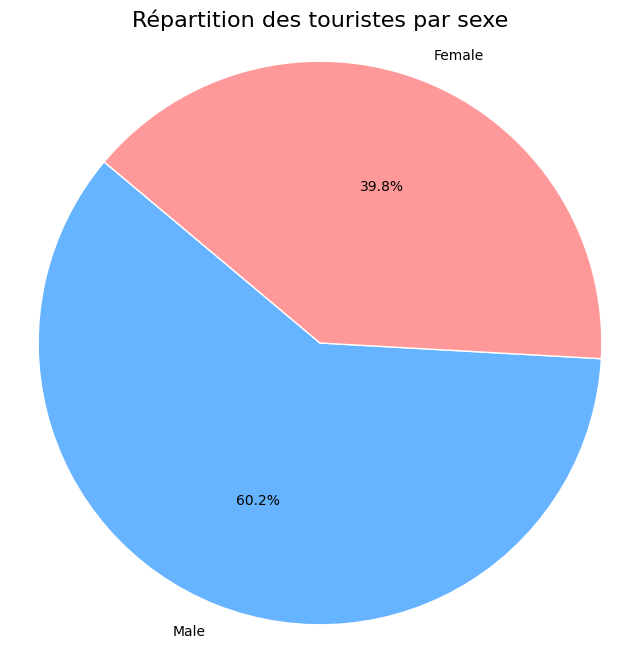

In [5]:
import matplotlib.pyplot as plt

# Répartition des touristes par sexe
sex_counts = data['Sex'].value_counts()

# Couleurs personnalisées pour les tranches du pie chart
colors = ['#66b3ff' ,'#ff9999']

# Création du pie chart avec des options de personnalisation
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})

# Ajout de titre et suppression du label y
plt.title('Répartition des touristes par sexe', fontsize=16)
plt.ylabel('')
plt.axis('equal')  
plt.show()


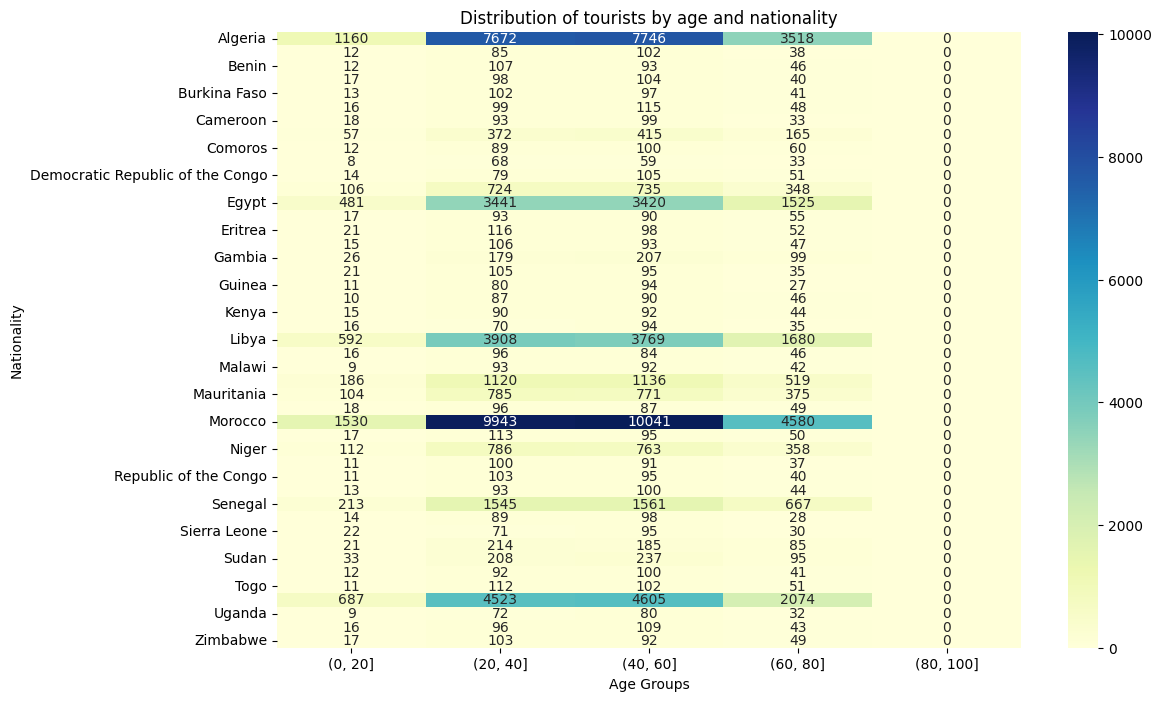

In [6]:
age_nationality = data.groupby(['Nationality', pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100])]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(age_nationality, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of tourists by age and nationality')
plt.xlabel('Age Groups')
plt.ylabel('Nationality')
plt.show()

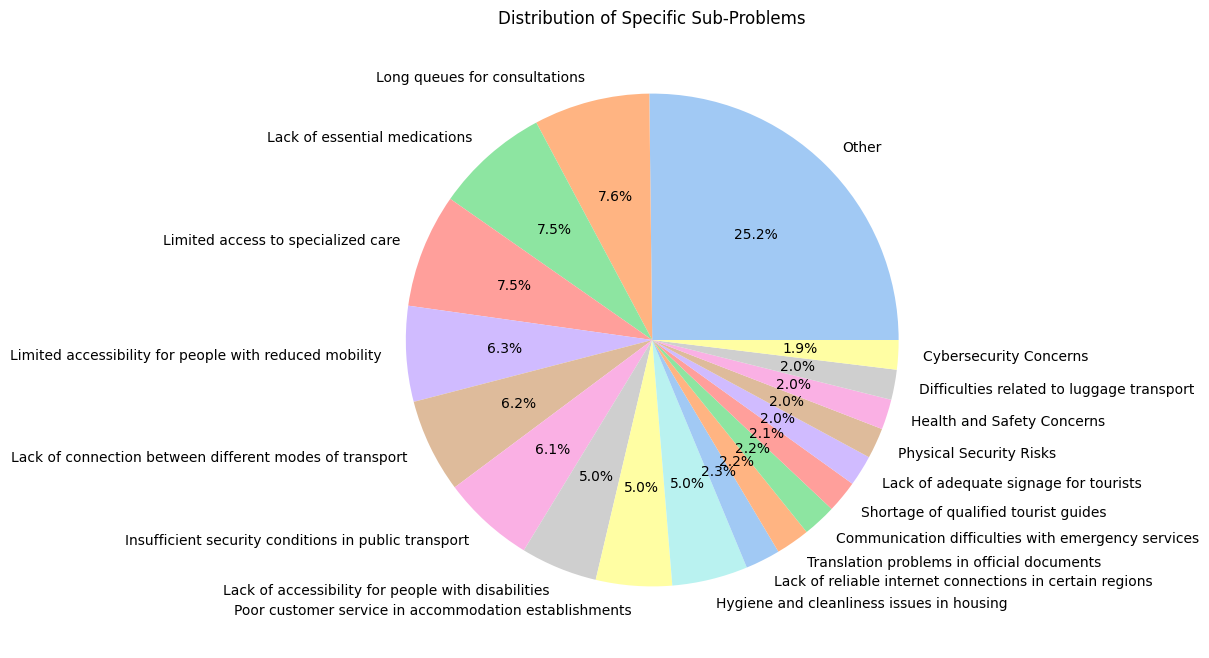

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
# Create the pie chart
data['Specific Sub-Problem'].value_counts().plot.pie(autopct='%1.1f%%',  colors=sns.color_palette('pastel'))

plt.title('Distribution of Specific Sub-Problems')
plt.ylabel('')
plt.show()


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [8]:
coords = {
    "Agadir": [30.427755, -9.598107],
    "Casablanca": [33.5731104, -7.5898434],
    "Fes": [34.0331300, -5.0002800],
    "Rabat": [34.020882, -6.841650],
    "Tangier": [35.759465, -5.833954],
    "Marrakech": [31.6341600, -7.9999400],
    "Other": [None, None]
}
data['Latitude'] = data["Residence Location"].map(lambda x: coords[x][0])
data['Longitude'] = data["Residence Location"].map(lambda x: coords[x][1])
import numpy as np
import pandas as pd

# Supposons que vous ayez un DataFrame 'data' contenant vos données brutes

# Agréger les données par emplacement et compter le nombre de problèmes par emplacement
data_aggregated = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Count')


# Créer une carte centrée sur le Maroc
map_heat_tendance = folium.Map(location=[32, -6], zoom_start=6)

# Créer une légende stylisée pour la heatmap
legend_html = """
     <div style="
         position: fixed; 
         bottom: 50px; 
         left: 50px; 
         width: 180px; 
         height: 130px; 
         border: 2px solid grey; 
         z-index: 9999; 
         font-size: 14px;
         background-color: rgba(255, 255, 255, 0.9);
         box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
         border-radius: 5px;
         ">
         <div style="
             padding: 10px;
             ">
             <p style="
                 margin: 0;
                 font-weight: bold;
                 color: #333333;
                 ">Tendance des problèmes</p>
             <hr style="
                 border-top: 1px solid #CCCCCC;
                 margin: 5px 0;
                 ">
             <p style="margin:0;"><span style="color:#FF0000;">&#9679;</span> Haut</p>
             <p style="margin:0;"><span style="color:#FFA500;">&#9679;</span> Moyen</p>
             <p style="margin:0;"><span style="color:#FFFF00;">&#9679;</span> Bas</p>
         </div>
     </div>
"""

# Ajouter la légende à la carte
map_heat_tendance.get_root().html.add_child(folium.Element(legend_html))

# Ajouter la légende à la carte
map_heat_tendance.get_root().html.add_child(folium.Element(legend_html))

# Créer une heatmap basée sur les données agrégées
heat_data = [[row['Latitude'], row['Longitude'], row['Count']] for index, row in data_aggregated.iterrows()]
HeatMap(heat_data, radius=15).add_to(map_heat_tendance)

# Enregistrer la carte au format HTML
map_heat_tendance.save('heatmap_tendance_problemes.html')

# Afficher la carte
map_heat_tendance


NameError: name 'HeatMap' is not defined

In [ ]:
import plotly.express as px

# Créer le graphique interactif
fig = px.scatter(data, x="Age", y="Lieu de résidence", color="Problème général", 
                 hover_name="Nationalité", title="Répartition des problèmes par âge et lieu de résidence",
                 labels={"Age": "Âge", "Lieu de résidence": "Lieu de résidence", 
                         "Problème général": "Problème général", "Nationalité": "Nationalité"})

# Enregistrer le graphique dans un fichier HTML
fig.write_html("repartition_problemes.html")
